### Social Media Analysis - Instagram 

In [23]:
# !pip install nltk
# nltk.download('all')
# !pip install plotly
# !pip install --upgrade pip
# !pip install --upgrade Pillow
# !pip install wordcloud
# !pip install textblob

     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
#importations
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
#reading in dataset and checking columns - 14/08
insta = pd.read_excel("instagram.xlsx")
insta.columns
# insta.isna()

Index(['title', 'content', 'from', 'location', 'date', 'images', 'url',
       'device', 'hits', 'likes', 'comments'],
      dtype='object')

In [3]:
insta.duplicated().sum()


0

In [4]:
#converting all column types to strings - 14/08
for column in insta:
  insta[column] = insta[column].astype('string')

In [5]:
#dropping columns and separating date and time columns - 14/08
new_insta = insta.drop(["title", "location", "hits", "url", "device", "device", "images"], axis = 1)
new_insta[['Date', 'Time']] = new_insta.date.str.split(" ", expand = True)
insta = new_insta.drop(["date", "Time"], axis = 1)
insta.head()

,content,from,likes,comments,Date
0,The FIFA World Cup Qatar 2022™ kicks off today...,vivo_global,430.0,8,2022-11-20
1,� FIFA World Cup Qatar 2022™ is only 3 days aw...,hisense_international,161.0,66,2022-11-17
2,The FIFA World Cup Qatar 2022™ kicks off in 3 ...,vivo_global,662.0,11,2022-11-17
3,The FIFA World Cup Qatar 2022™ is one week awa...,hisensesports,74.0,2,2022-11-12
4,We are 10 days away from the FIFA World Cup Qa...,hisensesports,46.0,3,2022-11-10


In [6]:
# basic stats
insta[["likes", "comments"]].describe()

,likes,comments
count,7624,7634
unique,1014,276
top,3.0,0
freq,778,4177


In [7]:
#sorting by date (for timeline) - 14/08
insta = insta.sort_values(by=["Date"])
#insta.head()
#insta.tail()

In [8]:
#converting to date-time and floating point - 14/08
insta['likes'] = insta['likes'].astype(float)
insta['comments'] = insta['comments'].astype(int)
insta['Date'] = pd.to_datetime(insta['Date'], format="%Y/%m/%d")
# insta.dtypes

In [9]:
# sorting content by most likes - 14/08
sorted_insta_likes = insta.sort_values(by="likes", ascending=False)
sorted_insta_likes.head()

,content,from,likes,comments,Date
7419,World Cup final � cruzbeckham roadto2022en #f...,davidbeckham,2552193.0,6812,2022-12-18
7143,Vamos leomessi ❤️�.Sizce bugün Dünya Kupasını ...,cznburak,1704190.0,6054,2022-12-18
7146,Güzel insan davidbeckham ile beraberiz❤️.Sizce...,cznburak,1599746.0,4415,2022-12-11
7546,Can't wait for this great World Cup semi-final...,m10_official,1589392.0,10354,2022-12-15
7420,Thank you for an unforgettable visit and a Wor...,iamzlatanibrahimovic,1337540.0,2992,2022-12-22


In [10]:
# sorting content by most comments - 14/08
sorted_insta_comments = insta.sort_values(by="comments", ascending=False)
sorted_insta_comments.head()

,content,from,likes,comments,Date
7426,A pitch invader carrying a rainbow flag brough...,cnn,517036.0,20473,2022-11-29
7546,Can't wait for this great World Cup semi-final...,m10_official,1589392.0,10354,2022-12-15
7421,American journalist Grant Wahl has died in Qat...,cnn,164963.0,7375,2022-12-10
7419,World Cup final � cruzbeckham roadto2022en #f...,davidbeckham,2552193.0,6812,2022-12-18
7143,Vamos leomessi ❤️�.Sizce bugün Dünya Kupasını ...,cznburak,1704190.0,6054,2022-12-18


In [12]:
##EDA 

#to do: 
# - most used words by user 
# - correlation matrix of likes and comments 

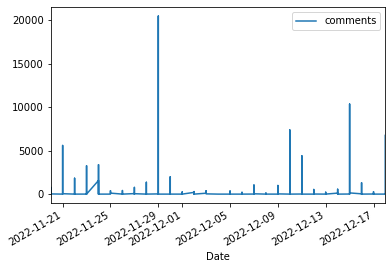

<Figure size 288x864 with 0 Axes>

In [11]:
#trend of comments - 21/08
insta.plot(x="Date", y="comments")
plt.xlim(["2022-11-20", "2022-12-18"])
plt.figure(figsize=(4,12))
plt.show()

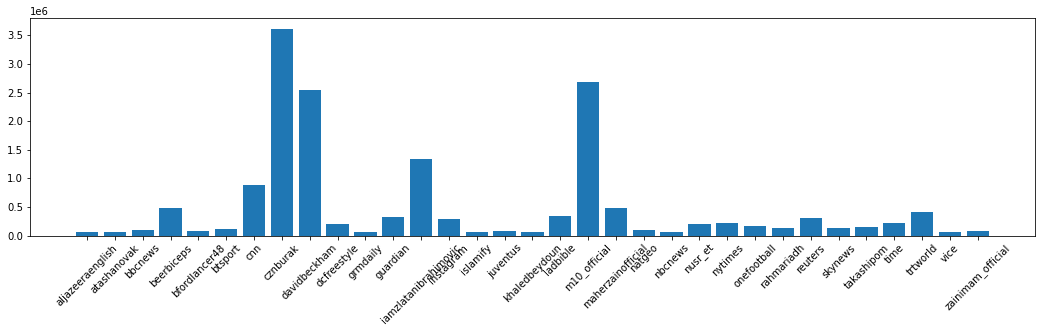

In [12]:
#users with most number of likes - 21/08
user_likes = insta.groupby(["from"])["likes"].sum()
filtered_user_likes = user_likes[user_likes >= 50000]
# filtered_user_likes

fig, ax = plt.subplots(figsize=(18, 4))
plt.bar(filtered_user_likes.index, filtered_user_likes.values)
plt.xticks(rotation=45)
plt.show()
#need to increase the fig size + colour 

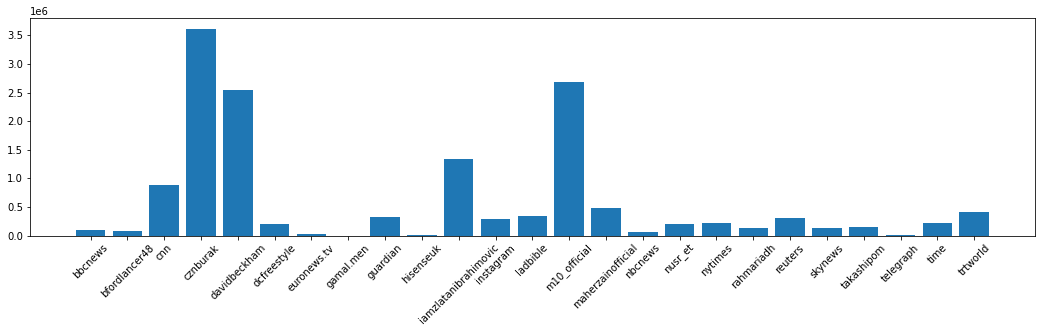

In [13]:
#users with most number of comments - 21/08
user_com = insta.groupby("from")["comments"].sum()
filtered_user_com = user_likes[user_com >= 1000]

fig, ax = plt.subplots(figsize=(18, 4))
plt.bar(filtered_user_com.index, filtered_user_com.values)
plt.xticks(rotation=45)
plt.show()

### Research Questions for this dataset: 

- What type of content specifically generates the most interest in terms of engagement? (news, WC updates, other) 
- Is engagement dependent on the the type of user (news outlet, influencer, common user etc.) 
- Which hashtags are the most used in posts? Does using certain hastags result in higher engagement? 
- Does content with positive sentiment generate more engagement than those with negative? 

In [14]:
#stop words - 21/08

# insta.head()
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

insta['content'] = insta['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

insta.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snous\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snous\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,from,likes,comments,Date
7400,entered #Hisense amazonfiretv competition year...,hisense_usa,35.0,1,2022-11-01
7024,support successful delivery FIFA World Cup Qat...,gulftimes,53.0,6,2022-11-01
7618,���World Cup trophies official football ⚽️⚽️⚽️...,chinaxinhuanews,175.0,2,2022-11-02
7141,卡達�� 世足賽2022要到了！你的足球魂已經開啟了嗎？� Qatar World Cup2...,herotai_official,1072.0,20,2022-11-02
7402,Qatar’s moment arrived.⁠ ⁠ tiny emirate using ...,apnews,1289.0,29,2022-11-02


In [15]:
#removing emojis - TAN COMPLETE 
df_emoji = pd.DataFrame(insta)
def remove_emojis(insta):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '',insta)
df_emoji.content=df_emoji['content'].apply(remove_emojis)
df_emoji


,content,from,likes,comments,Date
7400,entered #Hisense amazonfiretv competition year...,hisense_usa,35.0,1,2022-11-01
7024,support successful delivery FIFA World Cup Qat...,gulftimes,53.0,6,2022-11-01
7618,World Cup trophies official football for upcom...,chinaxinhuanews,175.0,2,2022-11-02
7141,"2022 Qatar World Cup2022 coming soon, ready ...",herotai_official,1072.0,20,2022-11-02
7402,Qatar’s moment arrived.⁠ ⁠ tiny emirate using ...,apnews,1289.0,29,2022-11-02
...,...,...,...,...,...
7080,United States' Special Advisor International D...,gulftimes,39.0,0,2023-01-26
7084,Qatar’s FIFA World Cup journey showcased secon...,gulftimes,9.0,0,2023-01-26
7083,Doha Declaration issued high-level event 42nd ...,gulftimes,55.0,2,2023-01-27
7082,Department Communication Public Relations Qata...,gulftimes,4.0,0,2023-01-27


In [18]:
#Need to remove punctuation and copyright 

In [17]:
# Remove specific words 
words_remove = ["fifa", "FIFA", "Qatar", "World", "Cup", "World Cup", "2022", "world", "cup", "Qatar Cup"]
stop_words = set(words_remove)
f = lambda x: ' '.join(w for w in x.split() if not w in stop_words)
df_emoji['content'] = df_emoji['content'].apply(f)
df_emoji.head()


,content,from,likes,comments,Date
7400,entered #Hisense amazonfiretv competition year...,hisense_usa,35.0,1,2022-11-01
7024,"support successful delivery 2022, Corniche man...",gulftimes,53.0,6,2022-11-01
7618,trophies official football for upcoming #FIFA ...,chinaxinhuanews,175.0,2,2022-11-02
7141,"Cup2022 coming soon, ready #HERO # womanqueen42",herotai_official,1072.0,20,2022-11-02
7402,Qatar’s moment arrived.⁠ ⁠ tiny emirate using ...,apnews,1289.0,29,2022-11-02


In [18]:
#Separating hashtags and content 

def split_text(text):
    parts = text.split('#')
    if len(parts) > 1:
        return parts[0], '#' + parts[1]
    else:
        return text, ''

# Apply the split_text function to each row in the DataFrame
df_emoji[['Content', 'Hashtag']] = df_emoji['content'].apply(split_text).apply(pd.Series)
insta = df_emoji.drop(["content"], axis=1)
insta.head()

,from,likes,comments,Date,Content,Hashtag
7400,hisense_usa,35.0,1,2022-11-01,entered,#Hisense amazonfiretv competition year yet?! c...
7024,gulftimes,53.0,6,2022-11-01,"support successful delivery 2022, Corniche man...",#qatar
7618,chinaxinhuanews,175.0,2,2022-11-02,trophies official football for upcoming,#FIFA
7141,herotai_official,1072.0,20,2022-11-02,"Cup2022 coming soon, ready",#HERO
7402,apnews,1289.0,29,2022-11-02,Qatar’s moment arrived.⁠ ⁠ tiny emirate using ...,#APPhotos Narman El-Mofty


(-0.5, 599.5, 399.5, -0.5)

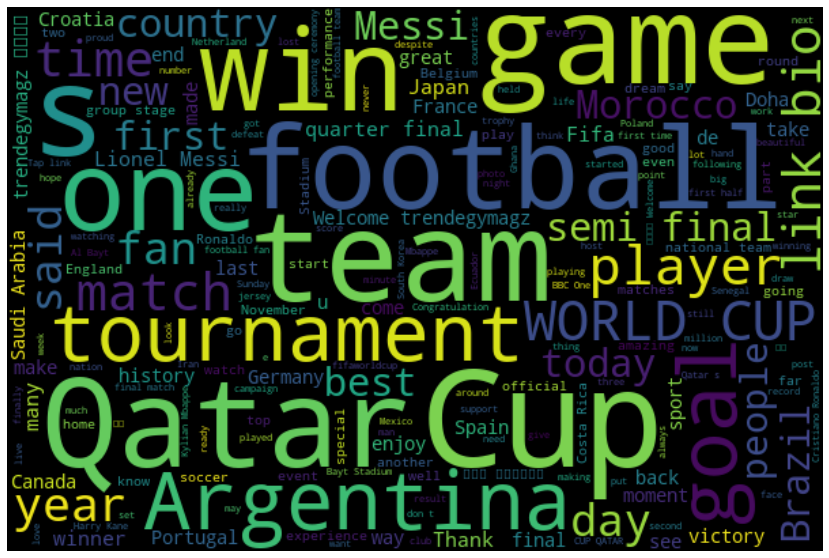

In [19]:
# word cloud for content 
insta["Content"] = insta["Content"].astype("string")

from wordcloud import WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    random_state=1,
)
data = insta['Content']
text_data = ' '.join(data)
wordcloud.generate(text_data)
wordcloud.to_image()

wordnet_lem = WordNetLemmatizer()
insta['Content'] = insta['Content'].apply(wordnet_lem.lemmatize)

all_words_lem = ' '.join([word for word in insta['Content']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=1, 
                     max_font_size=100).generate(all_words_lem)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

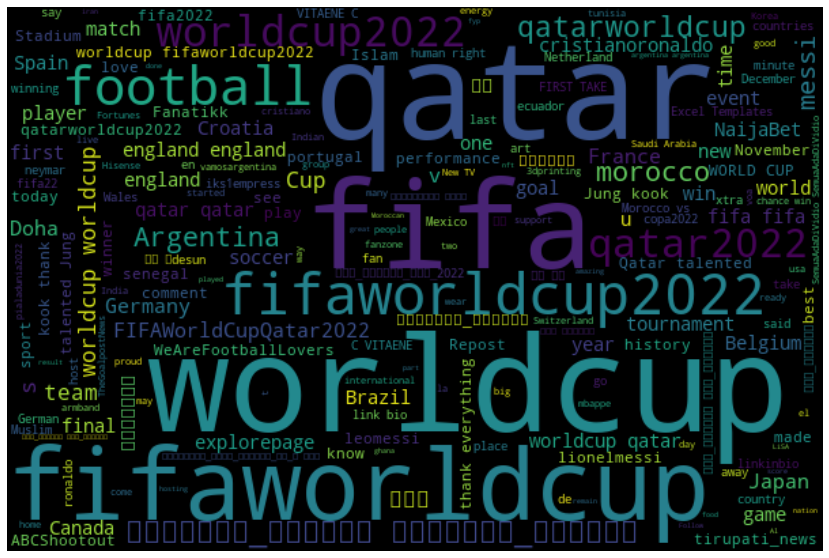

In [20]:
# word cloud for content 
insta["Hashtag"] = insta["Hashtag"].astype("string")

from wordcloud import WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    random_state=1,
)
data = insta['Hashtag']
text_data = ' '.join(data)
wordcloud.generate(text_data)
wordcloud.to_image()

wordnet_lem = WordNetLemmatizer()
insta['Hashtag'] = insta['Hashtag'].apply(wordnet_lem.lemmatize)

all_words_lem = ' '.join([word for word in insta['Hashtag']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=1, 
                     max_font_size=100).generate(all_words_lem)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
# splitting dataset into pre-match - 21/08
start_date = '2022-11-01'
end_date = '2022-11-19'
insta_pre = insta[(insta['Date'] >= start_date) & (insta['Date'] <= end_date)]
#insta_pre

In [ ]:
# splitting dataset into during match - need to further split by rounds once decided - 21/08
start_date = '2022-11-20'
end_date = '2022-12-18'
insta_during = insta[(insta['Date'] >= start_date) & (insta['Date'] <= end_date)]
#insta_during

In [ ]:
# splitting dataset into post-match - 21/08
start_date = '2022-12-19'
end_date = '2023-01-30'
insta_post = insta[(insta['Date'] >= start_date) & (insta['Date'] <= end_date)]
#insta_post

In [21]:
#RQ1 - categorising using k means unsupervised 
# need to further categorise based on the post content to see what it is 
X = insta['Content']

#used to evaluate the importance of a word within a document
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

num_clusters = 5  

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

cluster_labels = kmeans.labels_

insta['cluster'] = cluster_labels


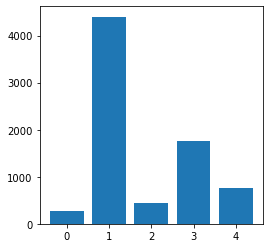

In [22]:
cluster_sum = insta.groupby(["cluster"]).count()
fig, ax = plt.subplots(figsize=(4, 4))
plt.bar(cluster_sum.index, cluster_sum["Content"].values)
plt.show()

In [30]:
#sentiment analysis model 
#polarity measures negative or positive sentiment with range -1 to 1 
#subjectivity measures factual vs personal information and lies within 0 to 1 
from textblob import TextBlob 

polarity = []
subjectivity = []

for text in insta["Content"]: 
    polarity.append(TextBlob(text).sentiment.polarity) 
    subjectivity.append(TextBlob(text).sentiment.subjectivity)
    


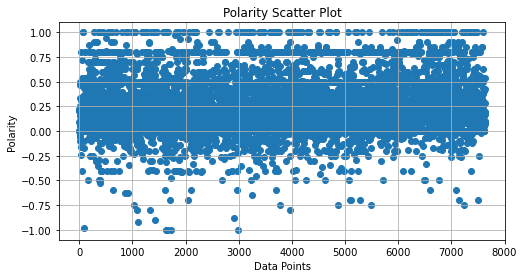

In [34]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(polarity)), polarity, label='Polarity')
plt.xlabel('Data Points')
plt.ylabel('Polarity')
plt.title('Polarity Scatter Plot')
plt.grid(True)

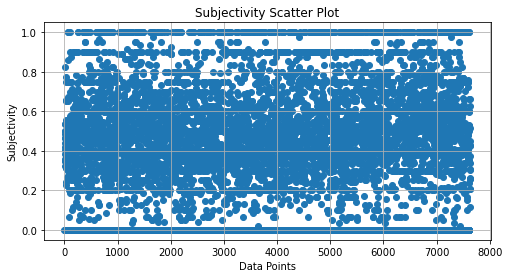

In [35]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(subjectivity)), subjectivity, label='Subjectivity')
plt.xlabel('Data Points')
plt.ylabel('Subjectivity')
plt.title('Subjectivity Scatter Plot')
plt.grid(True)

In [ ]:
#Possible to do: 
# append polarity and subjectivity to dataset and filter content through that 
# extract straight from list - might not be able to access users 